In [89]:
import streamlit as st
import pandas as pd
from PIL import Image
from glob import glob
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [7]:
ds_list = glob(".\datasets\*.csv")
ds_list

['.\\datasets\\2008_swing_states.csv', '.\\datasets\\co2-emissions.csv']

In [8]:
ds_path = ds_list[0]
file_name = Path(ds_path).stem

'2008_swing_states'

In [9]:
Path(ds_path).suffix

'.csv'

In [12]:
df = pd.read_csv(ds_path)
df_shape = df.shape
df_shape

(222, 6)

In [13]:
df_shape[0]

222

In [14]:
df_shape[1]

6

In [16]:
column_name = list(df.columns)
column_name

['state', 'county', 'total_votes', 'dem_votes', 'rep_votes', 'dem_share']

In [17]:
df_info = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state        222 non-null    object 
 1   county       222 non-null    object 
 2   total_votes  222 non-null    int64  
 3   dem_votes    222 non-null    int64  
 4   rep_votes    222 non-null    int64  
 5   dem_share    222 non-null    float64
dtypes: float64(1), int64(3), object(2)
memory usage: 10.5+ KB


In [18]:
type(df_info)

NoneType

In [19]:
pd.DataFrame(df_info)

""


In [27]:
df_dtypes = pd.DataFrame(df.dtypes, columns=['Dtype'])
df_dtypes.index.name='Columns'
df_dtypes

,Dtype
Columns,
state,object
county,object
total_votes,int64
dem_votes,int64
rep_votes,int64
dem_share,float64


In [35]:
df.isna().sum()

Columns
state          0
county         0
total_votes    0
dem_votes      0
rep_votes      0
dem_share      0
dtype: int64

In [38]:
type(df.isna().sum())

pandas.core.series.Series

In [39]:
df.state.info()

<class 'pandas.core.series.Series'>
RangeIndex: 222 entries, 0 to 221
Series name: state
Non-Null Count  Dtype 
--------------  ----- 
222 non-null    object
dtypes: object(1)
memory usage: 1.9+ KB


In [40]:
df.state.describe()

count     222
unique      3
top        OH
freq       88
Name: state, dtype: object

In [41]:
column_name

['state', 'county', 'total_votes', 'dem_votes', 'rep_votes', 'dem_share']

In [45]:
pd.DataFrame(df[column_name[0]].describe())

,state
count,222
unique,3
top,OH
freq,88


In [46]:
pd.DataFrame(df[column_name[0]].info())

<class 'pandas.core.series.Series'>
RangeIndex: 222 entries, 0 to 221
Series name: state
Non-Null Count  Dtype 
--------------  ----- 
222 non-null    object
dtypes: object(1)
memory usage: 1.9+ KB


""


In [48]:
df.state.isnull().sum()

0

In [54]:
df.state.nunique()

3

In [56]:
pd.nunique(df.state, axis=0)

AttributeError: module 'pandas' has no attribute 'nunique'

In [57]:
df.nunique(axis=0)

Columns
state            3
county         187
total_votes    221
dem_votes      222
rep_votes      222
dem_share      219
dtype: int64

In [75]:
pd.DataFrame(df.state.value_counts(ascending=True))

,state
PA,67
FL,67
OH,88


In [66]:
df.state.dtype == 'O'

True

In [67]:
chosen_column = 'state'

In [71]:
if df[chosen_column].dtype == 'O':
    df_unique = pd.DataFrame(df[chosen_column].value_counts(ascending=True), columns=['Count'])
    df_unique.index.name = chosen_column

In [72]:
df_unique

,Count
state,


In [74]:
df[chosen_column].value_counts(ascending=True)

PA    67
FL    67
OH    88
Name: state, dtype: int64

In [76]:
df_unique = pd.DataFrame(df[chosen_column].value_counts(ascending=True))

In [78]:
df_unique.rename(columns={'state':'count'}, inplace=True)
df_unique

,count
PA,67
FL,67
OH,88


In [79]:
df_unique.index.name = chosen_column

In [80]:
df_unique

,count
state,
PA,67
FL,67
OH,88


In [81]:
selected_columns = []

In [82]:
len(selected_columns)

0

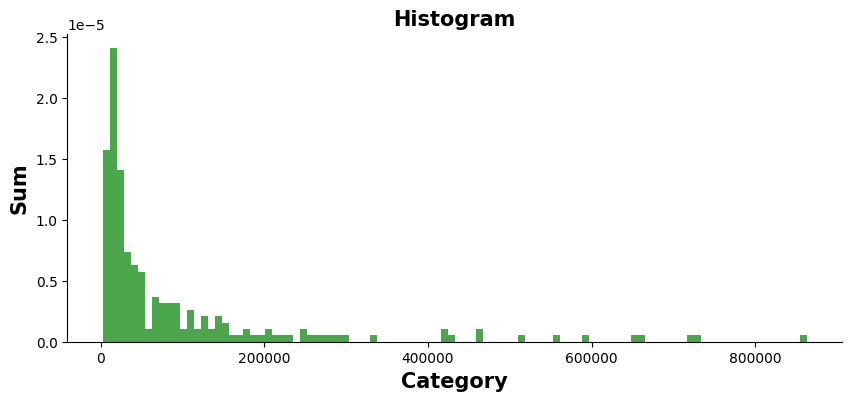

In [102]:
fig, ax = plt.subplots(figsize=(10, 4))
num_bins = 100
ax.hist(df.total_votes, num_bins, 
                            density = 1, 
                            color ='green',
                            alpha = 0.7)
ax.set_title(f'Histogram',fontdict={'fontsize': 15, 'fontweight': 'bold'})
ax.set_xlabel('Category', fontsize=15, fontweight='bold')
ax.set_ylabel('Sum', fontsize=15, fontweight='bold')
# Hide the right and top spines
ax.spines[['right', 'top']].set_visible(False)
plt.show()
   
# y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
#      np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
  
# plt.plot(bins, y, '--', color ='black')

In [105]:
col_viz = 'total_votes'

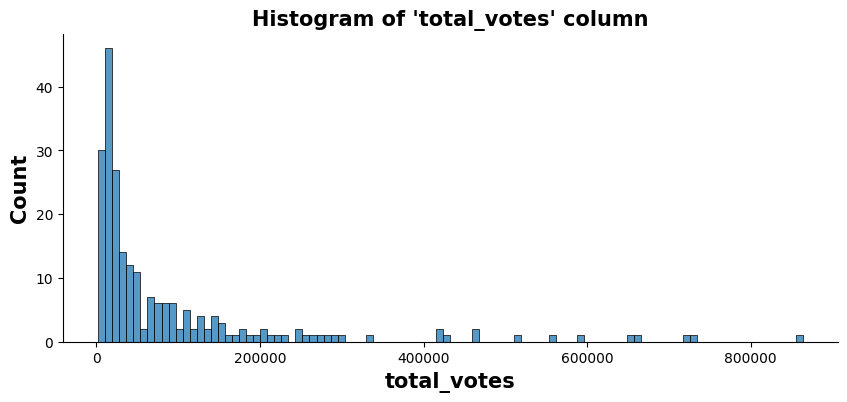

In [116]:
fig_sns, ax_sns = plt.subplots(figsize=(10, 4))
g = sns.histplot(data=df,
                x=col_viz,
                bins=100,
                ax=ax_sns)
g.set_title('Histogram of \'{}\' column'.format(col_viz),
                             fontdict={'fontsize': 15, 'fontweight': 'bold'})
g.set_xlabel('{}'.format(col_viz), fontsize=15, fontweight='bold')
g.set_ylabel('Count', fontsize=15, fontweight='bold')
sns.despine()
# Show plot
plt.show()

In [117]:
df_quantile = df.sort_values(col_viz, ascending=True)
percentage_list = np.arange(0,1.01,0.01)

amount_quantile = df_quantile[col_viz].quantile(percentage_list)

df_ecdf = pd.DataFrame({"amount_quantile": amount_quantile, "percentage_list":percentage_list}, index=percentage_list)

In [118]:
df_ecdf

,amount_quantile,percentage_list
0.00,2245.00,0.00
0.01,3153.18,0.01
0.02,3358.42,0.02
0.03,5478.22,0.03
0.04,5967.72,0.04
...,...,...
0.96,462802.36,0.96
0.97,530706.81,0.97
0.98,625842.88,0.98
0.99,706413.83,0.99


In [122]:
df_ecdf.percentage_list

0.00    0.00
0.01    0.01
0.02    0.02
0.03    0.03
0.04    0.04
        ... 
0.96    0.96
0.97    0.97
0.98    0.98
0.99    0.99
1.00    1.00
Name: percentage_list, Length: 101, dtype: float64

In [123]:
np.arange(0, 1.1, step=0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [132]:
df_ecdf.amount_quantile[0]

2245.0

In [136]:
type(df_ecdf.amount_quantile)

pandas.core.series.Series

In [137]:
df_ecdf.amount_quantile[1]

863486.0

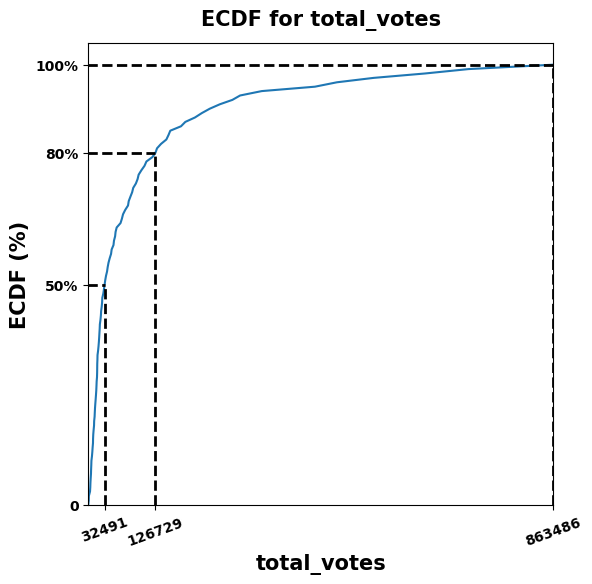

In [145]:
fig, ax = plt.subplots(figsize=(6,6))

plt.plot(df_ecdf.amount_quantile, df_ecdf.percentage_list)

quantile_50 = df_ecdf.loc[0.50, 'amount_quantile']
quantile_80 = df_ecdf.loc[0.80, 'amount_quantile']
quantile_100 = df_ecdf.loc[1.0, 'amount_quantile']

plt.vlines([quantile_50], ymin=0, ymax=0.5, linestyles='--', color='k', linewidth=2)
plt.hlines([0.50], xmin=0, xmax=quantile_50, linestyles='--', color='k', linewidth=2)

plt.vlines([quantile_80], ymin=0, ymax=0.8, linestyles='--', color='k', linewidth=2)
plt.hlines([0.80], xmin=0, xmax=quantile_80, linestyles='--', color='k', linewidth=2)


plt.vlines([quantile_100], ymin=0, ymax=1.0, linestyles='--', color='k', linewidth=2)
plt.hlines([1.0], xmin=0, xmax=quantile_100, linestyles='--', color='k', linewidth=2)


plt.yticks([0, 0.5, 0.8, 1], labels=['0', '50%', '80%', '100%'], weight = 'bold')
plt.xticks([quantile_50, quantile_80, quantile_100], 
              labels=[str(round(quantile_50)), str(round(quantile_80)), str(round(quantile_100))], 
              rotation=20, 
              weight = 'bold')

plt.ylim([0,1.05])
plt.xlim([df_ecdf.amount_quantile[0],df_ecdf.amount_quantile[1]])
plt.xlabel("{}".format(col_viz), weight = 'bold', fontsize=15)
plt.ylabel('ECDF (%)',weight = 'bold', fontsize=15)
plt.title("ECDF for {}".format(col_viz), weight = 'bold', fontsize=15, y=1.02)
plt.yticks(weight = 'bold')
plt.xticks(weight = 'bold')

# plt.legend()
plt.show()